# Transformers

In [1]:
#set up the workspace, environment and load libraries
#----------------------------------------------------
#Set sytem version
import sys
assert sys.version_info >= (3, 7)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#import sklearn
import sklearn
assert sklearn.__version__>="0.20"

#import tensorflow
from packaging import version
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

#import libraries
import pandas as pd
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import time
import random

#Figure setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Load the mfccs

In [2]:
mfcc_audio = pd.read_csv("40_mfccs.csv")
# Define the mapping dictionary
label_mapping = {'S1': 1, 'NS': 0}

# Replace values in the 'label' column using the mapping dictionary
mfcc_audio['label'] = mfcc_audio['label'].replace(label_mapping)

In [3]:
mfcc_audio.head()


,Timestamp,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,label
0,257.596372,-537.07886,154.11652,22.084454,6.238174,23.055553,12.908027,16.525238,17.342178,-0.552920,-4.357023,-0.642968,-2.800067,1.481005,1
1,259.410431,-544.65790,147.06793,24.835310,16.344970,25.811089,-1.012927,-0.630508,16.337854,12.610144,4.864126,-4.955047,-11.213172,6.148881,1
2,261.224490,-538.04224,149.88312,14.038742,0.463491,21.659729,8.927756,7.269213,9.386963,-2.967056,-1.834015,3.870445,-1.983592,0.384302,0
3,263.038549,-543.59390,135.29715,-2.651780,-6.254330,16.288395,3.872627,15.587953,20.193314,-5.577685,-2.103594,15.537753,1.159706,-9.019775,0
4,264.852608,-526.62195,149.44693,2.051295,3.671203,26.484520,1.856499,1.816097,5.263338,-8.200325,4.228234,11.221953,-9.414037,-4.712317,0


In [4]:
# Create sequences for each label
sequences = []
current_sequence = []
current_label = None

for index, row in mfcc_audio.iterrows():
    if current_label is None:
        current_label = row['label']

    if row['label'] == current_label:
        # Continue adding to the current sequence
        current_sequence.append(row[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4','MFCC_5','MFCC_6','MFCC_7','MFCC_8',
                                     'MFCC_9','MFCC_10','MFCC_11','MFCC_12','MFCC_13']].values)
    else:
        # Start a new sequence
        sequences.append((current_sequence, current_label))
        current_sequence = [row[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4','MFCC_5','MFCC_6','MFCC_7','MFCC_8',
                                     'MFCC_9','MFCC_10','MFCC_11','MFCC_12','MFCC_13']].values]
        current_label = row['label']

# Append the last sequence
sequences.append((current_sequence, current_label))

# Combine "S1" and "NS" sequences
combined_sequences = []
for seq, label in sequences:
    if label in [1, 0]:
        combined_sequences.append((seq, label))

In [5]:
MFCCS,LABELS=zip(*combined_sequences)
mfcc_df=pd.DataFrame(MFCCS)
mfcc_df.insert(0, 'Label', LABELS)

In [13]:
mfcc_df

,Label,0,1,2,3,4,5,6,7,8,...,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666
0,1.0,"[-537.07886, 154.11652, 22.084454, 6.2381735, ...","[-544.6579, 147.06793, 24.83531, 16.34497, 25....",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,0.0,"[-538.04224, 149.88312, 14.038742, 0.4634912, ...","[-543.5939, 135.29715, -2.6517797, -6.2543297,...","[-526.62195, 149.44693, 2.0512948, 3.671203, 2...","[-542.824, 141.40186, 7.8462496, 2.9633768, 25...","[-548.22675, 140.36053, 14.067926, 1.1166353, ...","[-540.92426, 140.6514, 4.2363524, 1.1979914, 2...","[-543.7942, 139.77072, 7.3598013, 3.2795455, 2...","[-537.4772, 143.39764, 2.8012404, -2.7023358, ...","[-548.06946, 138.9385, 6.739003, -7.6569624, 1...",...,None,None,None,None,None,None,None,None,None,None
2,1.0,"[-545.0805, 136.64236, 0.3318379, -6.4775524, ...","[-522.8921, 170.17908, 35.55906, 24.220943, 38...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0.0,"[-539.63184, 147.88058, 14.53023, 3.9066298, 2...","[-541.44965, 142.73807, 9.861092, 4.101213, 20...","[-537.4819, 148.17099, 19.940388, 17.636852, 2...","[-547.60284, 142.20828, 11.509911, -6.1662893,...","[-541.04425, 149.08487, 15.641863, -3.096877, ...","[-540.9943, 145.77753, 11.788635, 1.6036718, 2...","[-540.5581, 136.53854, -1.8328326, 2.9848182, ...","[-545.9589, 142.24185, 13.706534, 4.0029335, 2...","[-543.023, 137.57767, 1.7767072, -1.6131831, 1...",...,None,None,None,None,None,None,None,None,None,None
4,1.0,"[-539.0071, 142.16226, 5.777419, 4.368764, 25....","[-538.02246, 146.17697, 7.510976, -1.6173105, ...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,1.0,"[-533.8933, 157.36238, 20.816936, 3.0501928, 2...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2591,0.0,"[-542.69806, 140.85909, 4.715271, -4.0155964, ...","[-543.6373, 145.46283, 14.849075, 1.3188611, 2...","[-544.07135, 140.76248, 4.266408, -7.2491717, ...","[-542.85, 140.75848, 2.3099704, -7.7848225, 20...","[-546.8623, 135.0036, 2.4007683, 0.6827544, 22...","[-544.30927, 140.00064, 9.614738, 2.4769154, 1...","[-538.8493, 142.1409, 3.1667626, -0.7119832, 2...","[-541.6493, 143.84622, 7.733173, -6.3323402, 1...","[-546.142, 137.4996, 5.7413273, -1.4013568, 15...",...,None,None,None,None,None,None,None,None,None,None
2592,1.0,"[-496.90695, 182.9383, 14.139578, 6.8238506, 4...","[-533.2085, 157.63809, 29.539711, 17.880875, 1...","[-526.26697, 155.3147, 13.872038, 15.896248, 3...","[-531.277, 153.72446, 16.314667, 11.707939, 30...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2593,0.0,"[-538.2946, 136.52173, -6.976866, -2.8586283, ...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [6]:
#Create a list of lists of the sequences with [0] padding
data_list = mfcc_df.values.tolist()
replacement_value = np.array([0] * 13, dtype=object)
data_list = [[item if item is not None else replacement_value for item in sublist] for sublist in data_list]


In [8]:
# Define the maximum sequence length you want (e.g., 50)
max_seq_length = 50

# Create empty lists to store the sequences and labels
sequences = []
labels = []

# Iterate through each row in the data
for row in data_list:
    # Get the row name (label) and sequence data
    label = row[0]  # Assuming the label is in the first column
    sequence = row[1:]  # Exclude the label
    
    # Pad or truncate the sequence based on its length
    if len(sequence) > max_seq_length:
        sequence = sequence[:max_seq_length]
    elif len(sequence) < max_seq_length:
        sequence.extend([0] * (max_seq_length - len(sequence)))  # Pad with zeros
    
    # Append the processed sequence and label to the respective lists
    sequences.append(sequence)
    labels.append(label)

In [11]:
# Convert sequences and labels to NumPy arrays
X = np.array(sequences, dtype='float32')
y = np.array(labels)

### Test Train Split

In [139]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,shuffle=True, random_state=42)

# Split data into training and validation sets with stratified sampling
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train,shuffle=True, random_state=42)

# Check the shape of X_train, X_val, X_test, y_train, y_val, y_test to confirm the data format
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1764, 50, 13)
X_val shape: (312, 50, 13)
X_test shape: (519, 50, 13)
y_train shape: (1764,)
y_val shape: (312,)
y_test shape: (519,)


In [140]:
y_train

array([1., 1., 0., ..., 0., 0., 0.])

# Transformer model

In [141]:
# Define input shape for MFCC data
num_mfcc_features=13
max_seq_length = 50

In [155]:
from tensorflow import keras
from tensorflow.keras import layers


# Define the Transformer model
def create_transformer_model(max_seq_length, num_classes):
    inputs = keras.Input(shape=(max_seq_length, 13))  # Input shape for MFCCs
    
    # Add a masking layer to ignore padding tokens
    mask = layers.Masking(mask_value=[0.0, #1
                                      0.0,
                                      0.0,
                                      0.0, #4
                                      0.0,
                                      0.0,
                                      0.0, #7
                                      0.0,
                                      0.0,
                                      0.0,#10
                                      0.0,0.0,0.0]
                                      )(inputs)
    
    # Positional Encoding layer (you can customize this)
    position_encoding = layers.Embedding(input_dim=max_seq_length, output_dim=13)(tf.range(max_seq_length))
    position_encoded = mask + position_encoding
    
    # Multi-Head Self-Attention layer
    attention = layers.MultiHeadAttention(
        num_heads=8, key_dim=13, value_dim=13, dropout=0.1
    )(position_encoded, position_encoded)
    
    # Add and Layer Normalization
    attention = layers.Add()([mask, attention])
    attention = layers.LayerNormalization(epsilon=1e-6)(attention)
    
    # Feed-Forward layer
    ff_hidden = layers.Dense(64, activation="relu")(attention)
    ff_output = layers.Dense(13)(ff_hidden)
    
    # Add and Layer Normalization
    transformer_output = layers.Add()([attention, ff_output])
    transformer_output = layers.LayerNormalization(epsilon=1e-6)(transformer_output)
    
    # Global Average Pooling to reduce sequence length
    avg_pooling = layers.GlobalAveragePooling1D()(transformer_output)
    
    # Output layer for classification
    outputs = layers.Dense(num_classes, activation="softmax")(avg_pooling)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# Create the Transformer model
num_classes = 2  # Adjust this based on your number of classes
transformer_model = create_transformer_model(max_seq_length, num_classes)

# Compile the model and specify loss, optimizer, and metrics
transformer_model.compile(
    loss="sparse_categorical_crossentropy",  # Change this as needed for your problem
    optimizer="adam",  # Choose an optimizer
    metrics=["accuracy"]
)

# Print a summary of the model architecture
transformer_model.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 50, 13)]             0         []                            
                                                                                                  
 masking_8 (Masking)         (None, 50, 13)               0         ['input_11[0][0]']            
                                                                                                  
 tf.__operators__.add_22 (T  (None, 50, 13)               0         ['masking_8[0][0]']           
 FOpLambda)                                                                                       
                                                                                                  
 multi_head_attention_23 (M  (None, 50, 13)               5733      ['tf.__operators__.add_

In [156]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Fit the model
history = transformer_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# Evaluate the model on the test data
test_loss, test_accuracy = transformer_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
56/56 [==============================] - 3s 24ms/step - loss: 0.6190 - accuracy: 0.6661 - val_loss: 0.4444 - val_accuracy: 0.7821
Epoch 2/10
56/56 [==============================] - 1s 22ms/step - loss: 0.4052 - accuracy: 0.8175 - val_loss: 0.3922 - val_accuracy: 0.8237
Epoch 3/10
56/56 [==============================] - 1s 21ms/step - loss: 0.3560 - accuracy: 0.8600 - val_loss: 0.3696 - val_accuracy: 0.8558
Epoch 4/10
56/56 [==============================] - 1s 20ms/step - loss: 0.3555 - accuracy: 0.8594 - val_loss: 0.3591 - val_accuracy: 0.8622
Epoch 5/10
56/56 [==============================] - 1s 20ms/step - loss: 0.3590 - accuracy: 0.8537 - val_loss: 0.4082 - val_accuracy: 0.8269
Epoch 6/10
56/56 [==============================] - 1s 21ms/step - loss: 0.3502 - accuracy: 0.8554 - val_loss: 0.4263 - val_accuracy: 0.8141
Epoch 7/10
56/56 [==============================] - 1s 20ms/step - loss: 0.3611 - accuracy: 0.8554 - val_loss: 0.4040 - val_accuracy: 0.8333
Epoch 8/10
56

In [157]:
#function to obtain train,val and test predictions using 50% threshold
def y_pred_test_train_val(model,X_train,X_val,x_test):
    y_proba_train = model.predict(X_train)
    y_proba_valid = model.predict(X_val)
    y_proba_test = model.predict(x_test)
    y_pred_train = y_proba_train.argmax(axis=-1)
    y_pred_valid = y_proba_valid.argmax(axis=-1)
    y_pred_test = y_proba_test.argmax(axis=-1)
    return y_pred_train,y_pred_valid,y_pred_test

In [158]:
y_pred_train,y_pred_val,y_pred_test=y_pred_test_train_val(transformer_model,X_train,X_val,X_test)

17/17 [==============================] - 0s 7ms/step


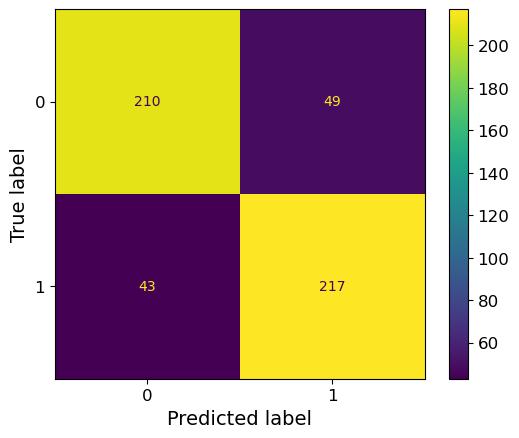

In [161]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_fig=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))

cm_fig.plot()



In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       259
         1.0       0.82      0.83      0.83       260

    accuracy                           0.82       519
   macro avg       0.82      0.82      0.82       519
weighted avg       0.82      0.82      0.82       519

